<a href="https://colab.research.google.com/github/LoguPrasanth-hub/Recommendation/blob/main/Movie_Recommendation_System_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Recommendation System Using ML**

In [ ]:
# Importing necessaries Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the datasets
movies=pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
movies.shape, ratings.shape

((10329, 3), (105339, 4))

In [ ]:
movies['movieId'].nunique(),ratings['movieId'].nunique()

(10329, 10325)

In [ ]:
ratings['userId'].nunique()

668

**POPULARITY-BASED RECOMMENDATIONS**

In [ ]:
movies1=movies.copy()

In [ ]:
movies1['genres']=movies['genres'].str.split('|')
movies1['genres']

,genres
0,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,"[Adventure, Children, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
10324,"[Animation, Children, Comedy]"
10325,[Comedy]
10326,[Comedy]
10327,[Drama]


In [ ]:
explode_movies=movies1.explode('genres')
explode_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [ ]:
df=ratings.merge(explode_movies,on=['movieId'],how='inner')
df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime
1,1,16,4.0,1217897793,Casino (1995),Drama
2,1,24,1.5,1217895807,Powder (1995),Drama
3,1,24,1.5,1217895807,Powder (1995),Sci-Fi
4,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery
...,...,...,...,...,...,...
281899,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama
281900,668,143385,4.0,1446388585,Bridge of Spies (2015),Thriller
281901,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror
281902,668,144976,2.5,1448656898,Bone Tomahawk (2015),Western


In [ ]:
explode_movies['genres'].nunique()

20

In [ ]:
explode_movies=explode_movies[explode_movies["genres"]!="(no genres listed)"]

In [ ]:
explode_movies['genres'].nunique()

19

In [ ]:
df1=df.groupby(['title','genres']).agg({"rating":["mean","size"]}).reset_index()
df1.columns=['Movie Title','Genre','Avg Rating','Num Ratings']
df1=df1.sort_values(by='Num Ratings',ascending=False)
df1

,Movie Title,Genre,Avg Rating,Num Ratings
16332,Pulp Fiction (1994),Crime,4.160000,325
16334,Pulp Fiction (1994),Thriller,4.160000,325
16333,Pulp Fiction (1994),Drama,4.160000,325
16331,Pulp Fiction (1994),Comedy,4.160000,325
7466,Forrest Gump (1994),Comedy,4.138264,311
...,...,...,...,...
11701,"Last Song, The (2010)",Romance,3.000000,1
11709,"Last Station, The (2009)",Drama,2.500000,1
11731,"Last Winter, The (2006)",Horror,3.000000,1
11735,"Last of Sheila, The (1973)",Crime,3.000000,1


In [ ]:
df1.shape

(23105, 4)

In [ ]:
def recommendations1(genre,threshold,top_n):
  movies=df1[(df1['Genre']==genre) & (df1['Num Ratings']>=threshold)]
  top_movies=movies.sort_values(by='Avg Rating',ascending=False).head(top_n)
  top_movies['S.No']=range(1,len(top_movies)+1)

  print(f"Total Recommendation Movies on '{genre}' is {len(movies)}")
  return top_movies[['S.No','Movie Title','Avg Rating','Num Ratings','Genre']].set_index('S.No')

In [ ]:
#g=input("Enter the Genre : ")
#t=int(input("Enter the Threshold : "))
#n=int(input("Enter the Number of Recommendations : "))

In [ ]:
g="Action"
t=100
n=10
recommendations1(g,t,n)

Total Recommendation Movies on 'Action' is 64


,Movie Title,Avg Rating,Num Ratings,Genre
S.No,,,,
1,"Matrix, The (1999)",4.264368,261,Action
2,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228,Action
3,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224,Action
4,Inception (2010),4.189320,103,Action
5,Star Wars: Episode IV - A New Hope (1977),4.188645,273,Action
6,Fight Club (1999),4.188406,207,Action
7,Blade Runner (1982),4.169872,156,Action
8,"Princess Bride, The (1987)",4.163743,171,Action
9,Aliens (1986),4.146497,157,Action


**CONTENT-BASED RECOMMENDATIONS USING COSINE SIMILARITY**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
new_df=explode_movies.groupby("title").agg({"genres":lambda x : " ".join(list(x))}).reset_index()
new_df.rename(columns={'title':'Movie Title','genres':'Genre'},inplace=True)
new_df

,Movie Title,Genre
0,'71 (2014),Action Drama Thriller War
1,'Hellboy': The Seeds of Creation (2004),Action Adventure Comedy Documentary Fantasy
2,'Round Midnight (1986),Drama Musical
3,'Til There Was You (1997),Drama Romance
4,"'burbs, The (1989)",Comedy
...,...,...
10315,loudQUIETloud: A Film About the Pixies (2006),Documentary
10316,xXx (2002),Action Crime Thriller
10317,xXx: State of the Union (2005),Action Crime Thriller
10318,¡Three Amigos! (1986),Comedy Western


In [ ]:
vectorizer=TfidfVectorizer(analyzer='word',ngram_range=(1,3),min_df=1,stop_words='english')
tfidf_matrix=vectorizer.fit_transform(new_df['Genre'])

In [ ]:
similarity=cosine_similarity(tfidf_matrix)
similarity

array([[1.        , 0.02677945, 0.02931913, ..., 0.10229517, 0.        ,
        0.        ],
       [0.02677945, 1.        , 0.        , ..., 0.03626651, 0.02411583,
        0.02863994],
       [0.02931913, 0.        , 1.        , ..., 0.        , 0.        ,
        0.35526663],
       ...,
       [0.10229517, 0.03626651, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.02411583, 0.        , ..., 0.        , 1.        ,
        0.07090711],
       [0.        , 0.02863994, 0.35526663, ..., 0.        , 0.07090711,
        1.        ]])

In [ ]:
def recommendation2(title,top_n):
  index = new_df.index[new_df['Movie Title'] == title].tolist()[0]
  similarity_scores=list(enumerate(similarity[index]))
  similarity_scores=sorted(similarity_scores,reverse=True,key= lambda x:x[1])

  matching_movies=[i[0] for i in similarity_scores]
  matching_df=new_df.iloc[matching_movies]
  matching_df=matching_df[matching_df['Movie Title']!=title]

  matching_df['S.No']=range(1,len(matching_df)+1)
  return matching_df[['S.No','Movie Title']].set_index('S.No').head(top_n)

In [ ]:
t="Toy Story (1995)"
n=10

recommendation2(t,n)

,Movie Title
S.No,
1,"Adventures of Rocky and Bullwinkle, The (2000)"
2,Antz (1998)
3,Asterix and the Vikings (Astérix et les Viking...
4,"Boxtrolls, The (2014)"
5,DuckTales: The Movie - Treasure of the Lost La...
6,"Emperor's New Groove, The (2000)"
7,"Monsters, Inc. (2001)"
8,Shrek the Third (2007)
9,"Tale of Despereaux, The (2008)"


In [ ]:
t="'Hellboy': The Seeds of Creation (2004)"
n=10

recommendation2(t,n)

,Movie Title
S.No,
1,Allan Quatermain and the Lost City of Gold (1987)
2,Armour of God (Long xiong hu di) (1987)
3,Armour of God II: Operation Condor (Operation ...
4,Austin Powers: International Man of Mystery (1...
5,Austin Powers: The Spy Who Shagged Me (1999)
6,Batman (1966)
7,Casino Royale (1967)
8,Crocodile Dundee II (1988)
9,Delta Farce (2007)


In [ ]:
t="Avatar (2009)"
n=10

recommendation2(t,n)

,Movie Title
S.No,
1,After Earth (2013)
2,"Amazing Spider-Man, The (2012)"
3,"Avengers, The (2012)"
4,Captain America: The Winter Soldier (2014)
5,Ender's Game (2013)
6,Godzilla (2014)
7,"Hunger Games: Catching Fire, The (2013)"
8,John Carter (2012)
9,Oblivion (2013)


**CONTENT-BASED RECOMMENDATIONS USING LINEAR KERNEL**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(movies['genres'])

In [ ]:
lk=linear_kernel(tfidf_matrix,tfidf_matrix)
lk

array([[1.        , 0.79977247, 0.1589222 , ..., 0.2638368 , 0.        ,
        0.        ],
       [0.79977247, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1589222 , 0.        , 1.        , ..., 0.60235038, 0.        ,
        0.        ],
       ...,
       [0.2638368 , 0.        , 0.60235038, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']

def recommendation2(title):
  idx = indices[title]
  sim_scores = list(enumerate(lk[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:21]
  movie_indices = [i[0] for i in sim_scores]
  return titles.iloc[movie_indices]

In [ ]:
recommendation2("Toy Story (1995)")

,title
1815,Antz (1998)
2496,Toy Story 2 (1999)
2967,"Adventures of Rocky and Bullwinkle, The (2000)"
3166,"Emperor's New Groove, The (2000)"
3811,"Monsters, Inc. (2001)"
6617,DuckTales: The Movie - Treasure of the Lost La...
6997,"Wild, The (2006)"
7382,Shrek the Third (2007)
7987,"Tale of Despereaux, The (2008)"
9215,Asterix and the Vikings (Astérix et les Viking...


**COLLABORATIVE-BASED RECOMMENDATIONS (USER-BASED)**

In [ ]:
ratings.userId.nunique()

668

In [ ]:
def UserHistory(id):
  Movies=movies1[['title','movieId']]
  user_ratings=ratings[ratings['userId']==id]
  user_history=pd.merge(user_ratings,Movies,on='movieId',how='inner').sort_values('movieId')
  return user_history

In [ ]:
def recommendation3(id,p,k,top_n):
  #Fetching user history
  user_history=UserHistory(id)

  #Finding all users who have seen similar movies
  similar_users=ratings[ratings['movieId'].isin(user_history['movieId'].tolist())]

  #Finding num of movies reviewed by candidate similar users
  user_movies_reviewed=similar_users.groupby("userId").agg({"movieId":"nunique"})\
                               .reset_index()\
                               .rename(columns={"movieId":"Num Reviewed"})\
                               .sort_values("Num Reviewed",ascending=False)

  #Removing target user ID from the similar user subset
  user_movies_reviewed=user_movies_reviewed[user_movies_reviewed["userId"]!=id]

  #Movies Rated by Target user
  movies_rated=user_history['movieId'].nunique()

  #Min movies rated by candidate similar users : Criteria 1 : Should be atleast 50% ( p is set to 50)
  min_movies=int(movies_rated*(p/100))

  #Filtered candidates of similar users
  user_movies_reviewed=user_movies_reviewed[user_movies_reviewed["Num Reviewed"]>=min_movies]

  # Ratings Data for filtered candidates of similar users
  best_similar_users=similar_users[similar_users['userId'].isin(list(set(user_movies_reviewed.userId)))]

  #Creating vector representation for target user
  user_vector=user_history.pivot(index='userId',columns=['movieId'],values=['rating']).fillna(0)
  user_vector.columns=[str(each[1]) for each in user_vector.columns]

  #Creating vector representation for candidate similar users
  best_vector=best_similar_users.pivot(index='userId',columns=['movieId'],values=['rating']).fillna(0)
  best_vector.columns=[str(each[1]) for each in best_vector.columns]

  #Matching column names
  for each in set(user_vector.columns)-set(best_vector.columns):
    best_vector[each]=0
  best_vector=best_vector[user_vector.columns]

  #Finding Cosine Similarity Amongst all the candidate users
  similarity_df=pd.DataFrame(cosine_similarity(user_vector,best_vector)).T
  similarity_df.index=best_vector.index
  similarity_df.columns=['Similarity']

  #Filtering out top K similar users
  top_users=list(similarity_df.sort_values('Similarity',ascending=False).index[:k])

  #Selecting ratings data of similar K users
  similar_users_subset=ratings[ratings['userId'].isin(top_users)]

  #Selecting movies other than the ones rated by our target user
  similar_users_subset=similar_users_subset[~similar_users_subset['movieId'].isin(user_history['movieId'])]

  #Sorting the movies based on best average ratings of similar users and choosing topN movies
  best_movies=similar_users_subset.groupby('movieId').agg({'rating':'mean'}).reset_index().sort_values('rating',ascending=False)[:top_n]

  #Output topN recommendations
  output_df=pd.merge(best_movies,movies[['title','movieId']],on='movieId',how='inner')
  output_df.columns=['Movie ID','Average Rating', "Movie Title"]
  output_df["S.No"]=range(1,len(output_df)+1)

  #User History
  user_history.rename(columns={'movieId':'Movie ID','title':'Movie Title'},inplace=True)
  user_history=user_history.sort_values('rating',ascending=False)
  user_history['S.No']=range(1,len(user_history)+1
                             )
  return user_history[['S.No','Movie Title']], output_df[['S.No','Movie Title']]

In [ ]:
id=2
p=90
k=100
top_n=10
history, recommendations=recommendation3(id,p,k,top_n)

In [ ]:
history.head()

,S.No,Movie Title
0,1,Toy Story (1995)
26,2,"Time to Kill, A (1996)"
4,3,Sense and Sensibility (1995)
7,4,Dead Man Walking (1995)
10,5,Mr. Holland's Opus (1995)


In [ ]:
recommendations

,S.No,Movie Title
0,1,Mother (1996)
1,2,Up Close and Personal (1996)
2,3,Ransom (1996)
3,4,"Rock, The (1996)"
4,5,"Birdcage, The (1996)"
5,6,Heat (1995)
6,7,Happy Gilmore (1996)
7,8,Down Periscope (1996)
8,9,Muppet Treasure Island (1996)
9,10,Sabrina (1995)


In [ ]:
id=4
p=50
k=100
topN=10
history, recommendations=recommendation3(id,p,k,top_n)

In [ ]:
history.head()

,S.No,Movie Title
123,1,M*A*S*H (a.k.a. MASH) (1970)
93,2,Tarzan (1999)
26,3,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
101,4,"Color Purple, The (1985)"
29,5,Love in the Afternoon (1957)


In [ ]:
recommendations

,S.No,Movie Title
0,1,Joe's Apartment (1996)
1,2,Life as a House (2001)
2,3,Dracula (1931)
3,4,Tortilla Soup (2001)
4,5,Bedknobs and Broomsticks (1971)
5,6,"Three Caballeros, The (1945)"
6,7,Labyrinth (1986)
7,8,Double Happiness (1994)
8,9,Eve's Bayou (1997)
9,10,21 Up (1977)


**EDA**

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
df=ratings.merge(movies1,on=['movieId'],how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),"[Crime, Drama]"
1,1,24,1.5,1217895807,Powder (1995),"[Drama, Sci-Fi]"
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]"
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]"
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"


In [ ]:
high_rated=df.groupby('title')[['rating']].sum()
high_rated=high_rated.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


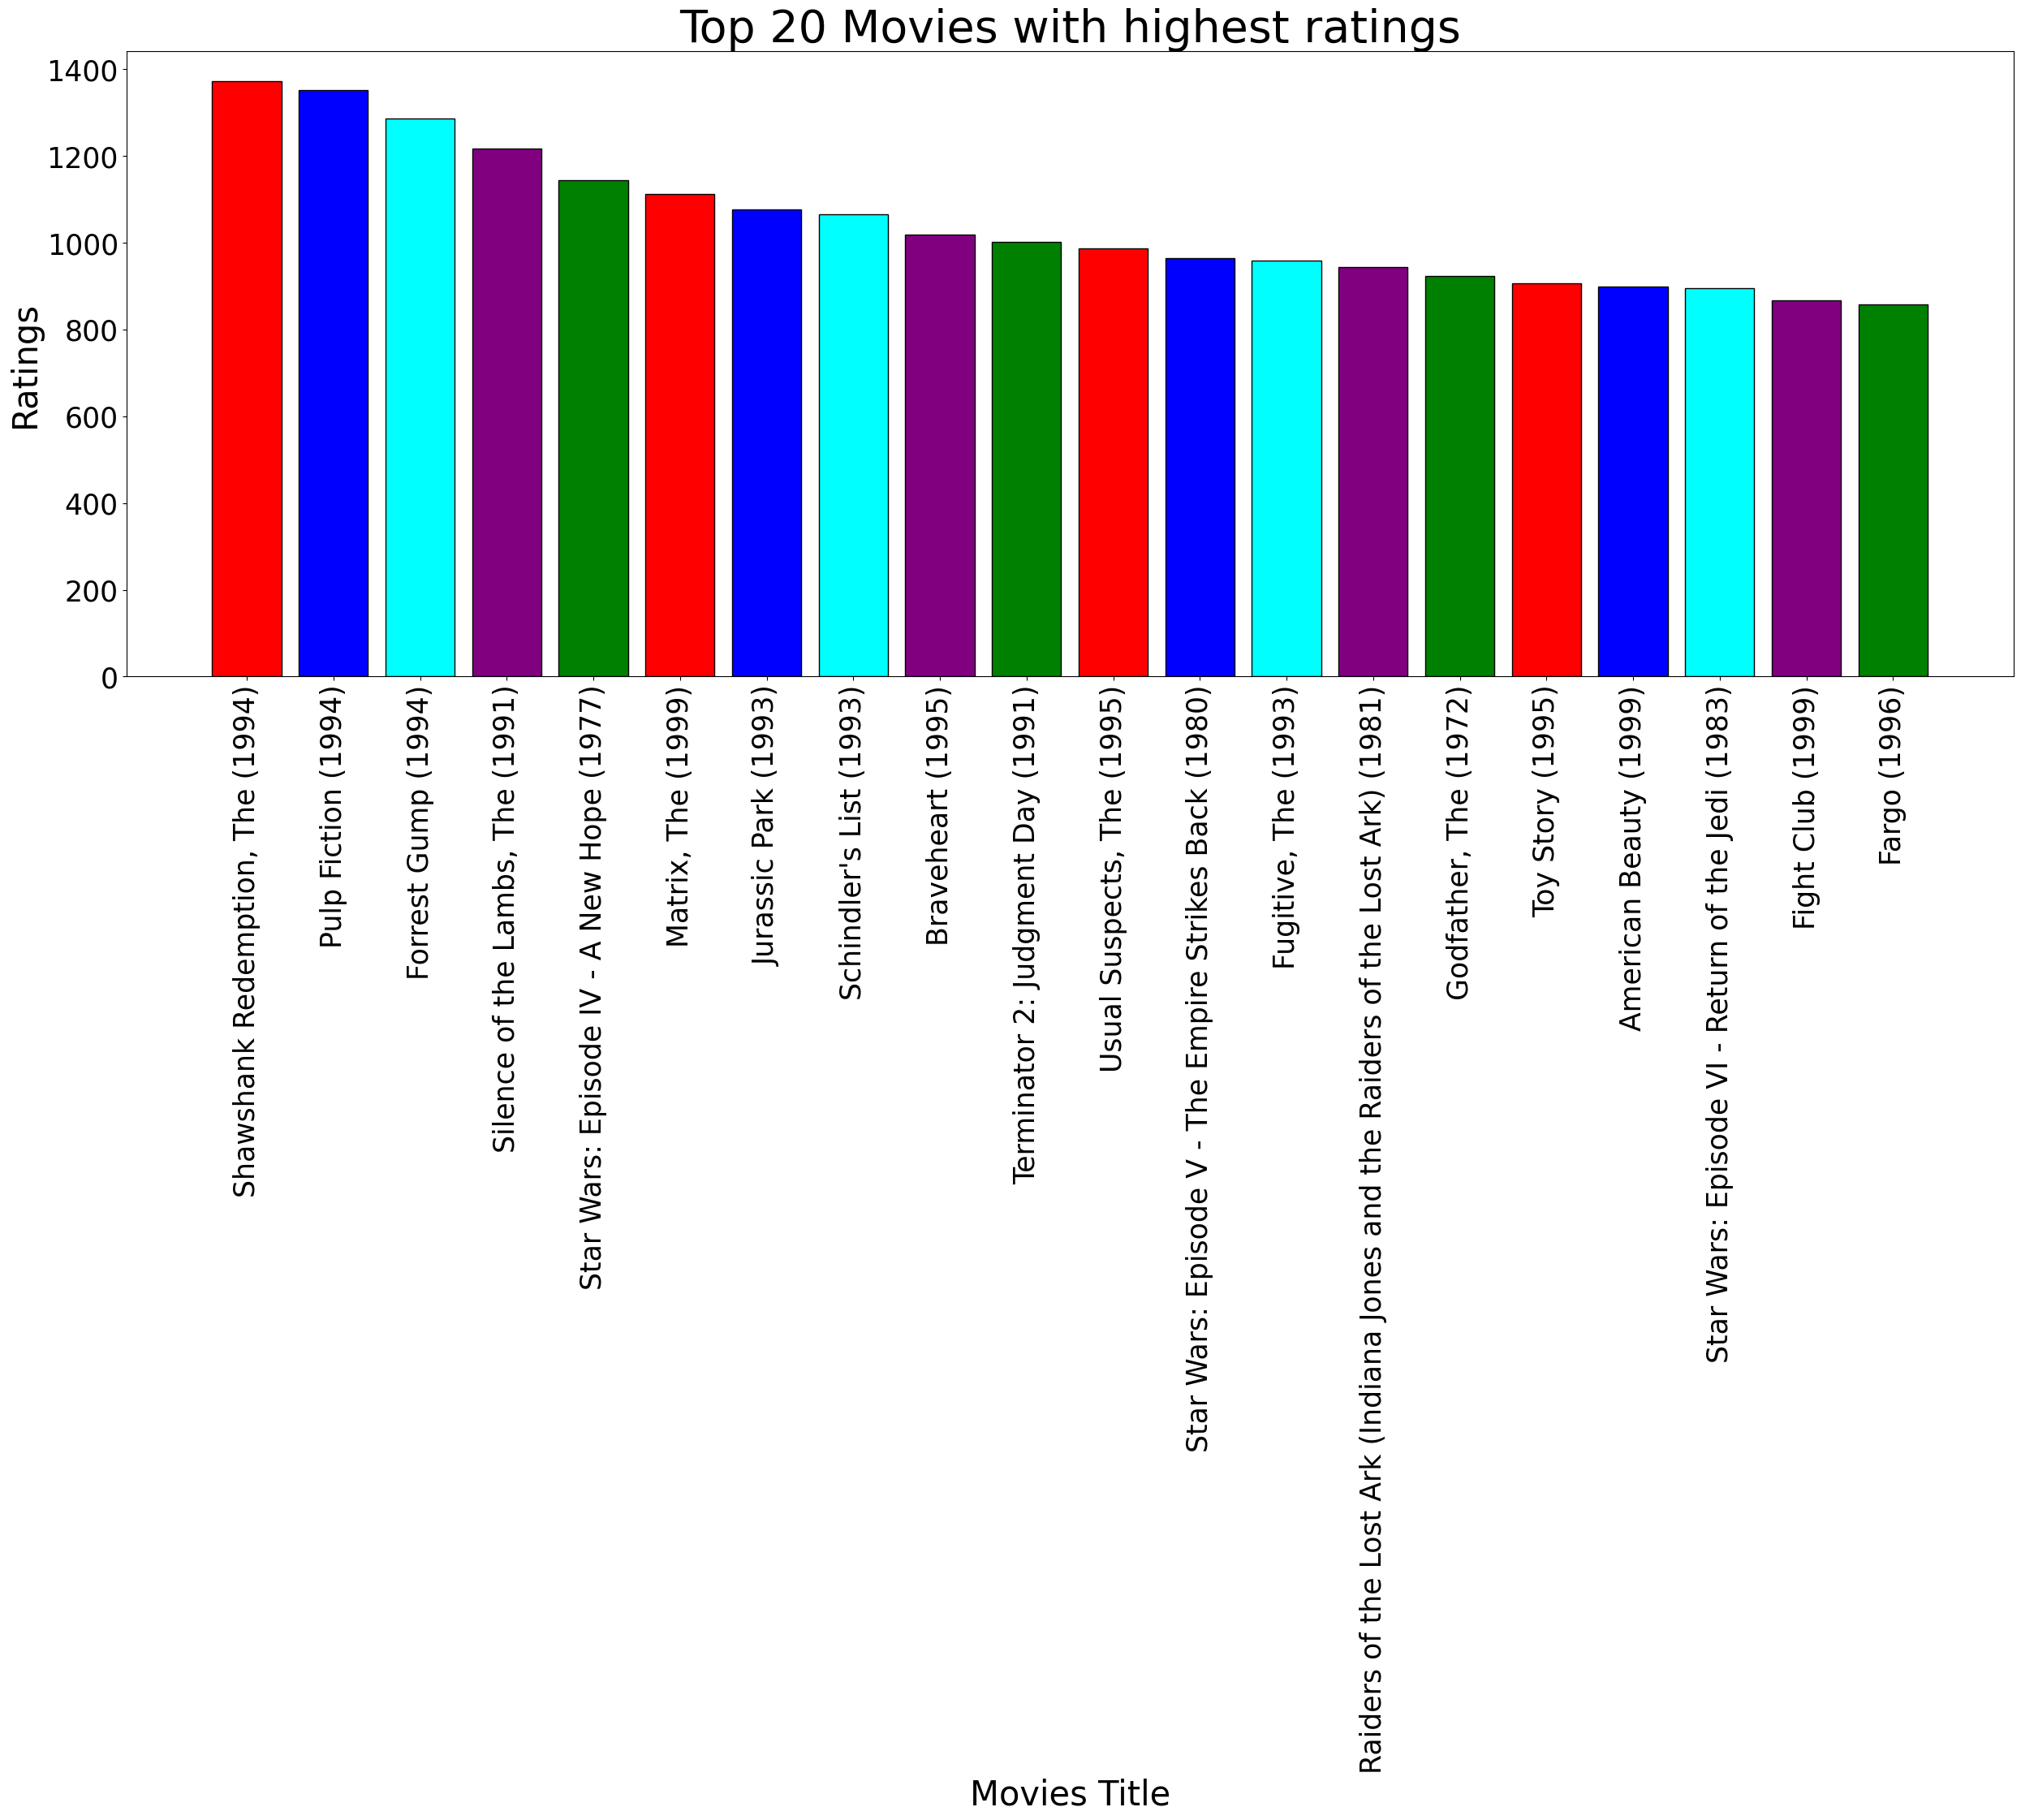

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Top 20 Movies with highest ratings",fontsize=40)
colors=['red','blue','cyan','purple','green']
plt.ylabel("Ratings",fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.xlabel("Movies Title",fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated.rating,color=colors,edgecolor='black')
plt.show()

In [ ]:
rating_count=df.groupby('title')[['rating']].count()
rating_count=rating_count.nlargest(20,'rating')
rating_count.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


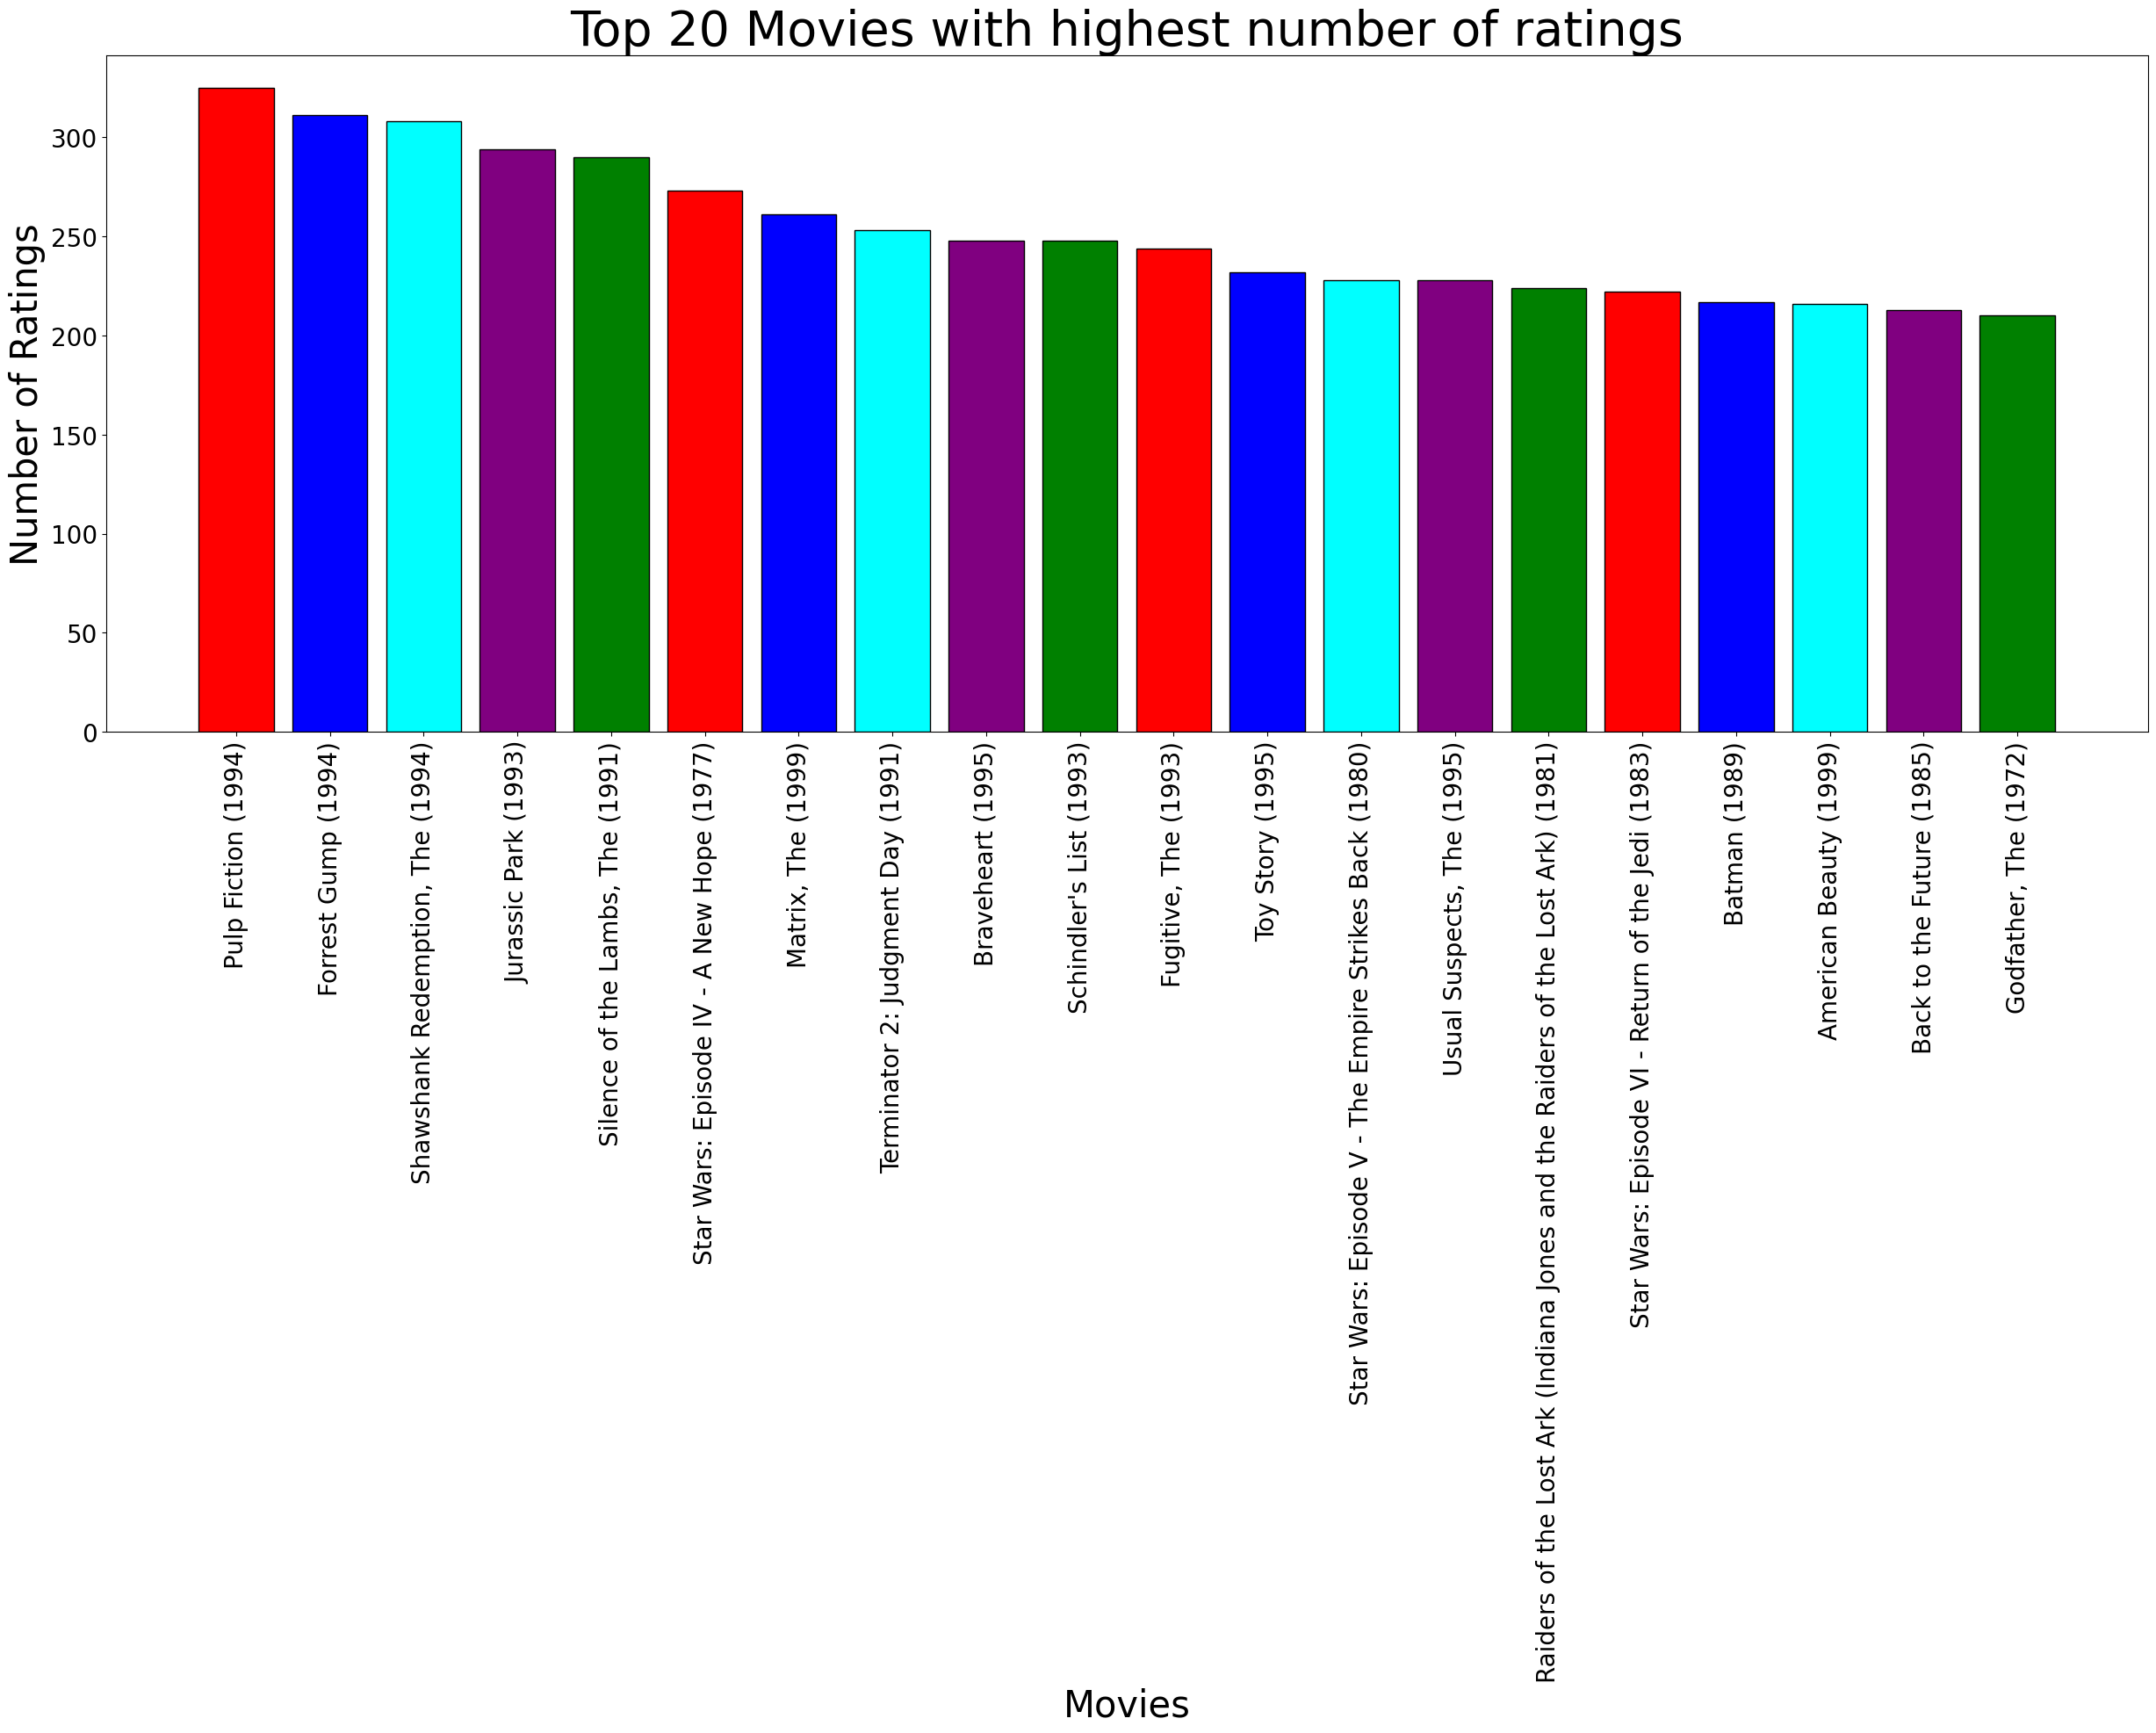

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Top 20 Movies with highest number of ratings",fontsize=40)
plt.xlabel("Movies",fontsize=30)
plt.ylabel("Number of Ratings",fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(rating_count.index,rating_count.rating,color=colors,edgecolor='black')
plt.show()

**WORD CLOUD**

In [ ]:
from wordcloud import WordCloud

In [ ]:
genres=[]
for genre in movies.genres:
  x=genre.split('|')
  for i in x:
    if i not in genres:
      genres.append(str(i))
genres=str(genres)

movie=[]
for title in movies.title:
  movie.append(title[0:-7])
movie=str(movie)

In [ ]:
genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [ ]:
movie

'[\'Toy Story\', \'Jumanji\', \'Grumpier Old Men\', \'Waiting to Exhale\', \'Father of the Bride Part II\', \'Heat\', \'Sabrina\', \'Tom and Huck\', \'Sudden Death\', \'GoldenEye\', \'American President, The\', \'Dracula: Dead and Loving It\', \'Balto\', \'Nixon\', \'Cutthroat Island\', \'Casino\', \'Sense and Sensibility\', \'Four Rooms\', \'Ace Ventura: When Nature Calls\', \'Money Train\', \'Get Shorty\', \'Copycat\', \'Assassins\', \'Powder\', \'Leaving Las Vegas\', \'Othello\', \'Now and Then\', \'Persuasion\', \'City of Lost Children, The (Cité des enfants perdus, La)\', \'Shanghai Triad (Yao a yao yao dao waipo qiao)\', \'Dangerous Minds\', \'Twelve Monkeys (a.k.a. 12 Monkeys)\', \'Wings of Courage\', \'Babe\', \'Carrington\', \'Dead Man Walking\', \'Clueless\', \'Cry, the Beloved Country\', \'Richard III\', \'Dead Presidents\', \'Restoration\', \'Mortal Kombat\', \'To Die For\', \'How to Make an American Quilt\', \'Seven (a.k.a. Se7en)\', \'Pocahontas\', \'When Night Is Falling

In [ ]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='white',min_font_size=20
                            ,min_word_length=3).generate(genres)

wordcloud_movie=WordCloud(width=1500,height=800,background_color='black',min_font_size=20
                            ,min_word_length=3).generate(movie)

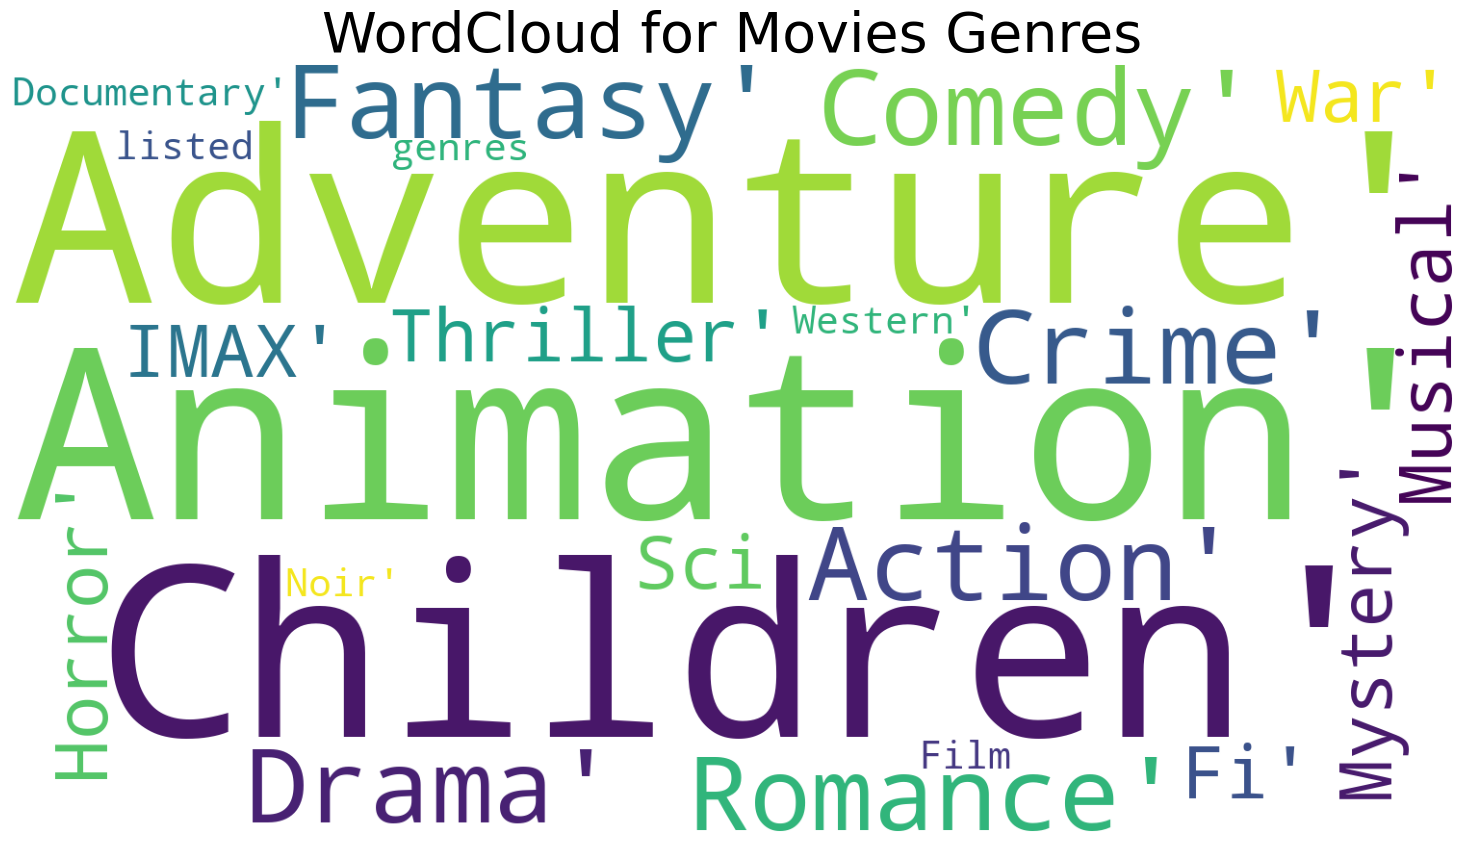

In [ ]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title("WordCloud for Movies Genres",fontsize=40)
plt.imshow(wordcloud_genre)
plt.show()

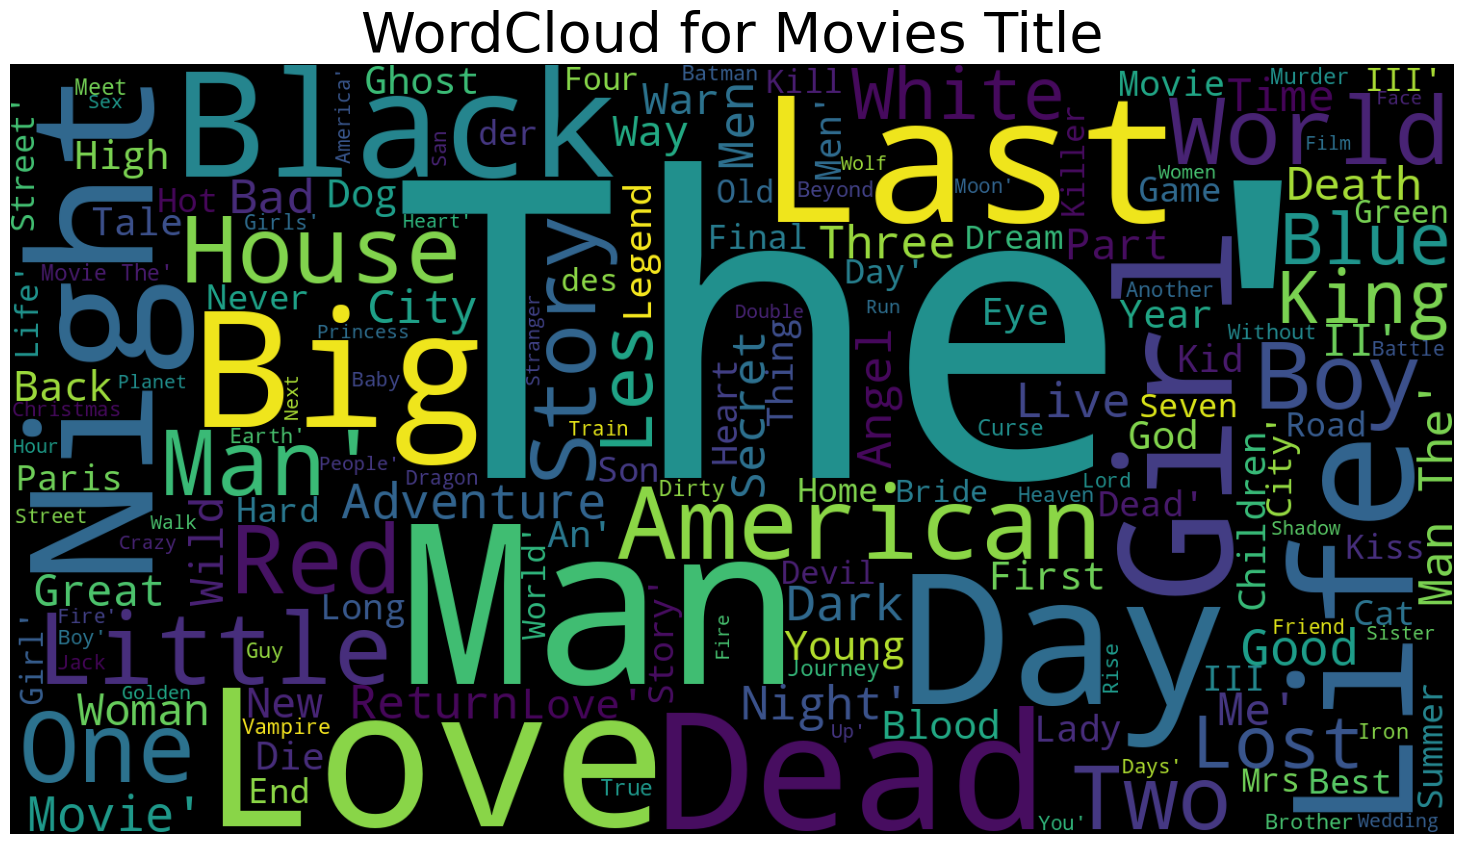

In [ ]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title("WordCloud for Movies Title",fontsize=40)
plt.imshow(wordcloud_movie)
plt.show()